# **Introduction**

- In a competitive product market, pricing is often influenced by various factors, including technical specifications, functional attributes, brand value, and consumer demand. Understanding how these factors collectively determine product prices is a fundamental challenge in data-driven market analysis.

- For sales managers, setting an appropriate price for a newly launched product is crucial for maximizing profit. By analyzing how the prices of similar products are determined based on their specifications, one can develop more effective pricing strategies.

- In this Lab, students are required to develop a predictive model using a neural network architecture to estimate the price level of mobile phones based on their specifications.

<div align="center">
    <img src="https://www.pbs.org/newshour/app/uploads/2015/07/GettyImages-166273202-1024x683.jpg" alt="Mobile Phone" width="300"/>
</div>


# **Environment**

- Similar to the previous lab, We will be using .ipynb (Jupyter Notebook) files and we recommend using **Anaconda**.
- It's a chance for you the get familiar with Anaconda since our **coding exam** will be using the same.
- If you are unsure about a function or its parameters, you can use help() to view its documentation. For example: help(train_test_split)
- In this Lab, we will introduce a new tool named **PyTorch**, a Python library designed for developing your own machine learning models. **PyTorch** provides a comprehensive set of tools for developing neural networks, including utilities for constructing datasets, building models, specifying optimizers and loss functions, as well as training and evaluating models.
    - For installing **PyTorch**, please follows the steps:
        1. **PyTorch** is only support for CUDA-based(NVIDIA) GPU and CPU. You can use `nvidia-smi` in command line to check the CUDA version of your GPU.
        2. Install **CUDA Toolkit** based on your CUDA version of your GPU. If you don't have GPU, skip this step.
            - Here's the official CUDA installation guide: https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/contents.html#
            - Here's the official CUDA Toolkit archive: https://developer.nvidia.com/cuda-toolkit-archive
        3. Install **PyTorch** based on your CUDA version of your GPU. If you don't have GPU, install the CPU version **PyTorch**.
            - Here's the official PyTorch installation guide: https://pytorch.org/get-started/locally/

# **Requirement**

- Do it individually! Not as a team! (The team is for final project)

- Deadline: **2025/11/11 23:59** (Late submission is not allowed!)

- Hand in following files to eeclass in the following format (Do not compressed!)
	- Lab4.ipynb
    - Lab4.csv

- Lab 4 would be covered on the coding and writing exam next time.

- Responsible TA: Yueh-Chun Liu (eugeneliu1998@gmail.com)
	- Email for questions or visit EECS 639 during TA hours.
	- No debugging service

# **Penalty Rules**

0 points if any of the following conditions happened
- Plagiarism
- Late submission
- Not using the template or importing any other packages
- No code (“Lab4.ipynb”) submission on eeclass
- No prediction csv files (“Lab4.csv) submission on eeclass
- Your submission was not generated by your code

5 Points would be deducted if your submission format is incorrect

# **Lab4**

In this Lab, you are required to complete the following tasks: 

- Part I: Preprocess Data and Build Dataset
    - Step 1: Split Data
    - Step 2: Preprocess Data
        - Step 2-1: Encode Numerical Features
        - Step 2-2: Encode Categorical Features
        - Step 2-3: Extract Label
        - Step 2-4: Concatenate Processed Numerical and Categorical Features with Label as New `DataFrame`
    - Step 3: Build Processed Data into `Dataset` and `DataLoader`
        - Step 3-1: Define Dataset with `torch.utils.data.Dataset`
        - Step 3-2: Define Dataloader with `torch.utils.data.DataLoader` With The Defined Dataset
        - Step 3-3: Build Train/Valid/Test Dataloader
- Part II: Train and Evaluate Your Model
    - Step 1: Build Model
        - Step 1-1: Define Model Class with `torch.nn.Module`
        - Step 1-2: Create Model with Defined Model Class
    - Step 2: Train Model
        - Step 2-1: Prepare For Training
        - Step 2-2: Start Training
    - Step 3: Evaluate Model
        - Step 3-1: Select Optimal Model
        - Step 3-2: Evaluate Model On Testing Dataset

⚠️ **Note:**
- **The final model performance would be used to evaluate your assignment. Please remember to check you've shown your validation performance (code are given) in your code file ("Lab4.ipynb") and saved your test prediction results for testing data into the csv file ("Lab4.csv") with correct file name before submitting them to eeclass.**
- **Here's the scoring policy:**
    1. **Validation Performance (50%): If your final model performance on your validation dataset meets: accuracy >= 77.00% AND weighted F1 score >= 77.00%, then you can get the full credits here.**
    2. **Testing Performance (45%): If your final model performance on the specified testing dataset meets: accuracy >= 75.00% AND weighted F1 score >= 75.00%, then you can get the full credits here.**
    3. **Questions (5%): You can get the corresponding credit if your answer is correctly for each question.**

### Import Packages

⚠️ You **cannot** import any other package

In [207]:
import os
import datetime
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch import optim
from torchsummary import summary

### Global attributes

Define the global attributes. \
You can also add your own global attributes here. \
**You might need to modify the hyperparameters for better model performance.**

In [208]:
## File input/output related attributes
## Hint: you might need to modify these variables for supporting your os system
training_dataroot = "train.csv"                 # Training data file name
testing_dataroot = "test.csv"                   # Testing data file name
model_save_root = "./model"                     # Root directory name for saving your models
test_prediction_csv_output_path = "Lab4.csv"    # Testing prediction csv file name

# create the model saving root if not exists
# Hint: if you encountering issues like os error, you can comment the following 2 lines of code and create the folder for saving your model manually
if not os.path.exists(model_save_root):
    os.makedirs(model_save_root)


## Model training related attributes
## TODO: try to modify the hyperparameters for better model performance
use_gpu = True       # whether use GPU when training model (*note that it will be ignored if there's no supported GPU in your machine and use CPU instead)
BATCH_SIZE = 32       # number of batch size when training model
NUM_EPOCHS = 100      # number of epochs when training model ###i change this 
LEARNING_RATE = 0.001  # learning rate of the optimizer

### Load the Input File

First, load the input file **train.csv** and **test.csv**. \
You can take a look for the data.

In [209]:
df_train_origin = pd.read_csv(training_dataroot)
df_test = pd.read_csv(testing_dataroot)

display(df_train_origin.head(5))
display(df_test.head(5))

print("Number of training data: {}".format(len(df_train_origin)))
print("Number of testing data:  {}".format(len(df_test)))

,battery_power,n_cores,ram,clock_speed,internal_memory,bluetooh,wifi,touch_screen,front_camera_resolution,primary_camera_resolution,...,mobile_width,screen_height,screen_width,screen_resolution_height,screen_resolution_width,four_g,five_g,dual_sim,talk_time,price_level
0,1549,5,3836,0.7,8,0,0,1,4,7,...,158,12,7,721,1514,1,0,0,15,2
1,525,7,1609,2.5,12,0,0,0,5,20,...,159,16,11,82,670,0,0,0,3,0
2,930,1,1743,2.1,54,0,0,1,0,13,...,80,7,1,1569,1763,0,0,1,9,2
3,852,5,315,1.8,8,0,0,0,5,9,...,160,7,6,683,1349,1,1,1,20,0
4,1221,7,2638,2.3,35,0,1,1,7,19,...,152,19,16,765,1899,1,1,0,14,2


,battery_power,n_cores,ram,clock_speed,internal_memory,bluetooh,wifi,touch_screen,front_camera_resolution,primary_camera_resolution,mobile_depth,mobile_width,screen_height,screen_width,screen_resolution_height,screen_resolution_width,four_g,five_g,dual_sim,talk_time
0,772,3,929,2.1,6,1,1,1,7,10,0.1,100,13,6,1277,1207,0,0,1,5
1,1097,8,3269,0.5,64,0,1,0,6,8,0.2,161,14,3,419,843,1,0,1,9
2,1470,7,1633,2.2,33,0,0,0,4,10,0.4,138,18,4,1790,1988,1,1,1,4
3,1163,5,1568,1.9,2,1,0,0,6,20,0.9,133,14,0,919,1076,1,0,0,19
4,1285,7,2094,2.4,57,0,0,0,8,2,1.0,140,8,9,212,500,1,0,0,11


Number of training data: 1700
Number of testing data:  300


# Part I: Preprocess Data and Build Dataset

In Part I, you need to preprocess features and label in original data, and build them into Pytorch `Dataset` and `DataLoader`.

## Step 1: Split Data

- Use **`train_test_split`** to divide the original training dataset into a training set and a validation set. The training set is used to train your model, while the validation set is used to evaluate its performance.

    - **The number of cases in your validation set should be greater than or equal to the number of cases in the testing set (i.e. 300).**
    - **We recommend you to set `random_state`=0 in `train_test_split` to ensure that the validation data is representative and the evaluation is consistent with the testing data.**

In [210]:
# Split df_train_origin into training set (df_train) and validation set (df_valid)
## TODO: 
df_train, df_valid = train_test_split(df_train_origin, test_size = 0.2, random_state=0)  # set random_state=0

In [211]:
# reset index of df_train and df_valid
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)

In [212]:
# show df_train, df_valid, df_test
display(df_train.head(5))
display(df_valid.head(5))
display(df_test.head(5))

print("Feature Names = {}".format([c for c in df_train.columns.values if c in df_test.columns.values]))
print("Label Name = {}".format([c for c in df_train.columns.values if c not in df_test.columns.values]))
print()
print("(Number of cases, Number of features) -> ")
print("Train: {}".format(df_train.shape))
print("Valid: {}".format(df_valid.shape))
print("Test:  {}".format(df_test.shape))

,battery_power,n_cores,ram,clock_speed,internal_memory,bluetooh,wifi,touch_screen,front_camera_resolution,primary_camera_resolution,...,mobile_width,screen_height,screen_width,screen_resolution_height,screen_resolution_width,four_g,five_g,dual_sim,talk_time,price_level
0,761,7,2248,0.5,3,1,1,1,9,15,...,196,19,3,1325,1945,1,0,0,15,2
1,1049,6,433,0.6,2,0,0,0,8,10,...,172,10,7,39,1564,1,1,1,6,0
2,1880,4,2968,0.5,7,0,0,1,0,1,...,104,9,0,890,1019,1,1,0,3,3
3,1481,3,2635,1.1,18,1,1,0,0,0,...,134,17,16,249,522,1,0,0,4,2
4,643,6,1417,0.7,23,1,0,0,3,13,...,156,13,6,314,1400,1,1,1,2,1


,battery_power,n_cores,ram,clock_speed,internal_memory,bluetooh,wifi,touch_screen,front_camera_resolution,primary_camera_resolution,...,mobile_width,screen_height,screen_width,screen_resolution_height,screen_resolution_width,four_g,five_g,dual_sim,talk_time,price_level
0,1602,3,1824,2.4,38,1,1,1,4,20,...,145,14,7,466,788,1,1,1,20,0
1,989,3,2349,0.7,51,1,1,0,13,15,...,132,10,1,670,804,1,1,0,20,1
2,1323,4,1892,2.5,28,1,1,1,10,12,...,131,10,0,162,619,1,1,1,15,1
3,947,2,2842,0.8,22,0,0,0,0,13,...,197,16,12,1176,1220,1,1,1,2,2
4,1541,4,1241,1.5,4,1,1,1,1,10,...,109,7,1,966,1656,1,1,1,4,1


,battery_power,n_cores,ram,clock_speed,internal_memory,bluetooh,wifi,touch_screen,front_camera_resolution,primary_camera_resolution,mobile_depth,mobile_width,screen_height,screen_width,screen_resolution_height,screen_resolution_width,four_g,five_g,dual_sim,talk_time
0,772,3,929,2.1,6,1,1,1,7,10,0.1,100,13,6,1277,1207,0,0,1,5
1,1097,8,3269,0.5,64,0,1,0,6,8,0.2,161,14,3,419,843,1,0,1,9
2,1470,7,1633,2.2,33,0,0,0,4,10,0.4,138,18,4,1790,1988,1,1,1,4
3,1163,5,1568,1.9,2,1,0,0,6,20,0.9,133,14,0,919,1076,1,0,0,19
4,1285,7,2094,2.4,57,0,0,0,8,2,1.0,140,8,9,212,500,1,0,0,11


Feature Names = ['battery_power', 'n_cores', 'ram', 'clock_speed', 'internal_memory', 'bluetooh', 'wifi', 'touch_screen', 'front_camera_resolution', 'primary_camera_resolution', 'mobile_depth', 'mobile_width', 'screen_height', 'screen_width', 'screen_resolution_height', 'screen_resolution_width', 'four_g', 'five_g', 'dual_sim', 'talk_time']
Label Name = ['price_level']

(Number of cases, Number of features) -> 
Train: (1360, 21)
Valid: (340, 21)
Test:  (300, 20)


## Step 2: Preprocess Data

- As you can see in the data, it contains both numerical and categorical features, and the scales of features vary significantly. Therefore, it is important to preprocess and encode them properly first before starting to train the model.

### Step 2-1: Encode Numerical Features

- **Numerical Features** are variables that represent **quantities** or **measurements**. They can be expressed as numbers which can be used in mathematical operations (e.g. addition, averaging, etc.). Numerical features can be either continuous (e.g. temperature, length, distance, etc.) or discrete (e.g. age, number of purchases, number of phone calls, etc.).
- The valid range of values for each numerical feature might vary significantly. Therefore, it is important to **normalize** them before training the model to prevent certain features from dominating the predictions results.
- Try to use **`MinMaxScaler`** to normalize each numerical feature into the range of (0, 1).
    - Note: You should fit the scaler on the **training set only**, and then use the same scaler to **transform** the training set, validation set, and the testing set.

In [213]:
# names of numerical features
numerical_feature_column_names = [
    "battery_power", 
    "n_cores", 
    "ram", 
    "clock_speed", 
    "internal_memory", 
    "front_camera_resolution", 
    "primary_camera_resolution", 
    "mobile_depth", 
    "mobile_width", 
    "screen_height", 
    "screen_width", 
    "screen_resolution_height", 
    "screen_resolution_width", 
    "talk_time", 
]

# show numerical features before preprocessing
numerical_train = df_train[numerical_feature_column_names]
numerical_valid = df_valid[numerical_feature_column_names]
numerical_test = df_test[numerical_feature_column_names]
print(
    "Before min-max scaling: \n" \
    "min = {} \n" \
    "max = {} \n".format(
        np.min(numerical_train.values, axis=0), np.max(numerical_train.values, axis=0), 
    )
)

# create scaler and preprocess numerical features with it
## TODO: 
min_max_scaler = MinMaxScaler()
scaled_train = min_max_scaler.fit_transform(numerical_train)
scaled_valid = min_max_scaler.transform(numerical_valid)
scaled_test = min_max_scaler.transform(numerical_test)
print(
    "After min-max scaling: \n" \
    "min = {} \n" \
    "max = {} \n".format(
        np.min(scaled_train, axis=0), np.max(scaled_train, axis=0), 
    )
)

Before min-max scaling: 
min = [5.01e+02 1.00e+00 2.56e+02 5.00e-01 2.00e+00 0.00e+00 0.00e+00 1.00e-01
 8.00e+01 5.00e+00 0.00e+00 0.00e+00 5.00e+02 2.00e+00] 
max = [1.997e+03 8.000e+00 3.998e+03 3.000e+00 6.400e+01 1.900e+01 2.000e+01
 1.000e+00 2.000e+02 1.900e+01 1.800e+01 1.949e+03 1.998e+03 2.000e+01] 

After min-max scaling: 
min = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
max = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 



In [214]:
# create new dataframe with processed numerical features: scaled_train, scaled_valid, scaled_test
df_scaled_train = pd.DataFrame(
    data=scaled_train, 
    columns=min_max_scaler.get_feature_names_out(), 
)
df_scaled_valid = pd.DataFrame(
    data=scaled_valid, 
    columns=min_max_scaler.get_feature_names_out(), 
)
df_scaled_test = pd.DataFrame(
    data=scaled_test, 
    columns=min_max_scaler.get_feature_names_out(), 
)

In [215]:
# show df_scaled_train, df_scaled_valid, df_scaled_test
display(df_scaled_train.head(5))
display(df_scaled_valid.head(5))
display(df_scaled_test.head(5))

print("Numerical Feature Names = {}".format(df_scaled_train.columns.values))
print()
print("(Number of cases, Number of features) -> ")
print("Train: {}".format(df_scaled_train.shape))
print("Valid: {}".format(df_scaled_valid.shape))
print("Test:  {}".format(df_scaled_test.shape))

,battery_power,n_cores,ram,clock_speed,internal_memory,front_camera_resolution,primary_camera_resolution,mobile_depth,mobile_width,screen_height,screen_width,screen_resolution_height,screen_resolution_width,talk_time
0,0.173797,0.857143,0.532336,0.00,0.016129,0.473684,0.75,0.777778,0.966667,1.000000,0.166667,0.679836,0.964619,0.722222
1,0.366310,0.714286,0.047301,0.04,0.000000,0.421053,0.50,0.222222,0.766667,0.357143,0.388889,0.020010,0.710280,0.222222
2,0.921791,0.428571,0.724746,0.00,0.080645,0.000000,0.05,0.555556,0.200000,0.285714,0.000000,0.456644,0.346462,0.055556
3,0.655080,0.285714,0.635756,0.24,0.258065,0.000000,0.00,0.444444,0.450000,0.857143,0.888889,0.127758,0.014686,0.111111
4,0.094920,0.714286,0.310262,0.08,0.338710,0.157895,0.65,0.666667,0.633333,0.571429,0.333333,0.161108,0.600801,0.000000


,battery_power,n_cores,ram,clock_speed,internal_memory,front_camera_resolution,primary_camera_resolution,mobile_depth,mobile_width,screen_height,screen_width,screen_resolution_height,screen_resolution_width,talk_time
0,0.735963,0.285714,0.419027,0.76,0.580645,0.210526,1.00,0.666667,0.541667,0.642857,0.388889,0.239097,0.192256,1.000000
1,0.326203,0.285714,0.559327,0.08,0.790323,0.684211,0.75,0.333333,0.433333,0.357143,0.055556,0.343766,0.202937,1.000000
2,0.549465,0.428571,0.437199,0.80,0.419355,0.526316,0.60,0.111111,0.425000,0.357143,0.000000,0.083120,0.079439,0.722222
3,0.298128,0.142857,0.691074,0.12,0.322581,0.000000,0.65,0.000000,0.975000,0.785714,0.666667,0.603386,0.480641,0.000000
4,0.695187,0.428571,0.263228,0.40,0.032258,0.052632,0.50,0.444444,0.241667,0.142857,0.055556,0.495639,0.771696,0.111111


,battery_power,n_cores,ram,clock_speed,internal_memory,front_camera_resolution,primary_camera_resolution,mobile_depth,mobile_width,screen_height,screen_width,screen_resolution_height,screen_resolution_width,talk_time
0,0.181150,0.285714,0.179850,0.64,0.064516,0.368421,0.5,0.000000,0.166667,0.571429,0.333333,0.655208,0.471963,0.166667
1,0.398396,1.000000,0.805184,0.00,1.000000,0.315789,0.4,0.111111,0.675000,0.642857,0.166667,0.214982,0.228972,0.388889
2,0.647727,0.857143,0.367985,0.68,0.500000,0.210526,0.5,0.333333,0.483333,0.928571,0.222222,0.918420,0.993324,0.111111
3,0.442513,0.571429,0.350615,0.56,0.000000,0.315789,1.0,0.888889,0.441667,0.642857,0.000000,0.471524,0.384513,0.944444
4,0.524064,0.857143,0.491181,0.76,0.887097,0.421053,0.1,1.000000,0.500000,0.214286,0.500000,0.108774,0.000000,0.500000


Numerical Feature Names = ['battery_power' 'n_cores' 'ram' 'clock_speed' 'internal_memory'
 'front_camera_resolution' 'primary_camera_resolution' 'mobile_depth'
 'mobile_width' 'screen_height' 'screen_width' 'screen_resolution_height'
 'screen_resolution_width' 'talk_time']

(Number of cases, Number of features) -> 
Train: (1360, 14)
Valid: (340, 14)
Test:  (300, 14)


### Step 2-2: Encode Categorical Features

- **Categorical Features** are variables that represent **categories** or **groups**. They discribe qualities or labels rather than numerical values. Categorical features can be either nominal (has no inherent order, e.g. gender, country, has married or not, etc.) or ordinal (has an natural order among values, e.g. education level, membership level, programming skill, etc.).
- Since the values of categorical features are often non-numeric and carry different meanings, we need to **encode** them into a numerical form. A common approach is to encode them into **one-hot representation**, which converts the concept of category into set of binary values.
- Try to use **`OneHotEncoder`** to encode each categorical feature into one-hot representation.
    - Note: You should fit the encoder on the **training set only**, and then use the same encoder to **transform** the training set, validation set, and the testing set.

In [216]:
# names of categorical features
categorical_feature_column_names = [
    "bluetooh", 
    "wifi", 
    "touch_screen", 
    "four_g", 
    "five_g", 
    "dual_sim", 
]

# show categorical features before preprocessing
categorical_train = df_train[categorical_feature_column_names]
categorical_valid = df_valid[categorical_feature_column_names]
categorical_test = df_test[categorical_feature_column_names]
print(
    "Before one-hot encoding: \n" \
    "feature names = {} \n".format(
        categorical_train.columns.values, 
    )
)

# create encoder and preprocess categorical features with it
## TODO: 
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
one_hot_train = one_hot_encoder.fit_transform(categorical_train)
one_hot_valid = one_hot_encoder.transform(categorical_valid)
one_hot_test = one_hot_encoder.transform(categorical_test)
print(
    "After one-hot encoding: \n" \
    "feature names = {} \n".format(
        one_hot_encoder.get_feature_names_out(), 
    )
)

Before one-hot encoding: 
feature names = ['bluetooh' 'wifi' 'touch_screen' 'four_g' 'five_g' 'dual_sim'] 

After one-hot encoding: 
feature names = ['bluetooh_0' 'bluetooh_1' 'wifi_0' 'wifi_1' 'touch_screen_0'
 'touch_screen_1' 'four_g_0' 'four_g_1' 'five_g_0' 'five_g_1' 'dual_sim_0'
 'dual_sim_1'] 



In [217]:
# create new dataframe with processed categorical features: one_hot_train, one_hot_valid, one_hot_test
df_one_hot_train = pd.DataFrame(
    data=one_hot_train.toarray(), 
    columns=one_hot_encoder.get_feature_names_out(), 
)
df_one_hot_valid = pd.DataFrame(
    data=one_hot_valid.toarray(), 
    columns=one_hot_encoder.get_feature_names_out(), 
)
df_one_hot_test = pd.DataFrame(
    data=one_hot_test.toarray(), 
    columns=one_hot_encoder.get_feature_names_out(), 
)

In [218]:
# show df_one_hot_train, df_one_hot_valid, df_one_hot_test
display(df_one_hot_train.head(5))
display(df_one_hot_valid.head(5))
display(df_one_hot_test.head(5))

print("Catecorical Feature Names = {}".format(df_one_hot_train.columns.values))
print()
print("(Number of cases, Number of features) -> ")
print("Train: {}".format(df_one_hot_train.shape))
print("Valid: {}".format(df_one_hot_valid.shape))
print("Test:  {}".format(df_one_hot_test.shape))

,bluetooh_0,bluetooh_1,wifi_0,wifi_1,touch_screen_0,touch_screen_1,four_g_0,four_g_1,five_g_0,five_g_1,dual_sim_0,dual_sim_1
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


,bluetooh_0,bluetooh_1,wifi_0,wifi_1,touch_screen_0,touch_screen_1,four_g_0,four_g_1,five_g_0,five_g_1,dual_sim_0,dual_sim_1
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


,bluetooh_0,bluetooh_1,wifi_0,wifi_1,touch_screen_0,touch_screen_1,four_g_0,four_g_1,five_g_0,five_g_1,dual_sim_0,dual_sim_1
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


Catecorical Feature Names = ['bluetooh_0' 'bluetooh_1' 'wifi_0' 'wifi_1' 'touch_screen_0'
 'touch_screen_1' 'four_g_0' 'four_g_1' 'five_g_0' 'five_g_1' 'dual_sim_0'
 'dual_sim_1']

(Number of cases, Number of features) -> 
Train: (1360, 12)
Valid: (340, 12)
Test:  (300, 12)


### Step 2-3: Extract Label

- Try to use `DataFrame` operations to extract the labels of all subjects in the training and validation sets.

In [219]:
# name of label feature
label_column_name = [
    "price_level", 
]

# extract the labels of all subjects
## TODO: 
df_label_train = df_train[label_column_name]
df_label_valid = df_valid[label_column_name]

# show number of classes and the valid values of the label
class_idxs = np.unique(df_label_train[label_column_name].values)
num_classes = len(class_idxs)
print("class_idxs = {}".format(class_idxs))
print("num classes = {}".format(num_classes))

class_idxs = [0 1 2 3]
num classes = 4


In [220]:
# show df_label_train, df_label_valid
display(df_label_train.head(5))
display(df_label_valid.head(5))

print("Label Names = {}".format(df_label_train.columns.values))
print()
print("(Number of cases, Number of features) -> ")
print("Train: {}".format(df_label_train.shape))
print("Valid: {}".format(df_label_valid.shape))

,price_level
0,2
1,0
2,3
3,2
4,1


,price_level
0,0
1,1
2,1
3,2
4,1


Label Names = ['price_level']

(Number of cases, Number of features) -> 
Train: (1360, 1)
Valid: (340, 1)


### Step 2-4: Concatenate Processed Numerical and Categorical Features with Label as New `DataFrame`

In [221]:
# concatenate dataframes of processed numerical features, processed categorical features and extracted label
df_preprocess_train = pd.concat(
    [df_scaled_train, df_one_hot_train, df_label_train], 
    axis=1, 
)
df_preprocess_valid = pd.concat(
    [df_scaled_valid, df_one_hot_valid, df_label_valid], 
    axis=1, 
)
df_preprocess_test = pd.concat(
    [df_scaled_test, df_one_hot_test], 
    axis=1, 
)

In [222]:
# show df_preprocess_train, df_preprocess_valid, df_preprocess_test
display(df_preprocess_train.head(5))
display(df_preprocess_valid.head(5))
display(df_preprocess_test.head(5))

print("Feature Names = {}".format([c for c in df_preprocess_train.columns.values if c in df_preprocess_test.columns.values]))
print("Label Name = {}".format([c for c in df_preprocess_train.columns.values if c not in df_preprocess_test.columns.values]))
print()
print("(Number of cases, Number of features) -> ")
print("Train: {}".format(df_preprocess_train.shape))
print("Valid: {}".format(df_preprocess_valid.shape))
print("Test:  {}".format(df_preprocess_test.shape))

,battery_power,n_cores,ram,clock_speed,internal_memory,front_camera_resolution,primary_camera_resolution,mobile_depth,mobile_width,screen_height,...,wifi_1,touch_screen_0,touch_screen_1,four_g_0,four_g_1,five_g_0,five_g_1,dual_sim_0,dual_sim_1,price_level
0,0.173797,0.857143,0.532336,0.00,0.016129,0.473684,0.75,0.777778,0.966667,1.000000,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2
1,0.366310,0.714286,0.047301,0.04,0.000000,0.421053,0.50,0.222222,0.766667,0.357143,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
2,0.921791,0.428571,0.724746,0.00,0.080645,0.000000,0.05,0.555556,0.200000,0.285714,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3
3,0.655080,0.285714,0.635756,0.24,0.258065,0.000000,0.00,0.444444,0.450000,0.857143,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2
4,0.094920,0.714286,0.310262,0.08,0.338710,0.157895,0.65,0.666667,0.633333,0.571429,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1


,battery_power,n_cores,ram,clock_speed,internal_memory,front_camera_resolution,primary_camera_resolution,mobile_depth,mobile_width,screen_height,...,wifi_1,touch_screen_0,touch_screen_1,four_g_0,four_g_1,five_g_0,five_g_1,dual_sim_0,dual_sim_1,price_level
0,0.735963,0.285714,0.419027,0.76,0.580645,0.210526,1.00,0.666667,0.541667,0.642857,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0
1,0.326203,0.285714,0.559327,0.08,0.790323,0.684211,0.75,0.333333,0.433333,0.357143,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
2,0.549465,0.428571,0.437199,0.80,0.419355,0.526316,0.60,0.111111,0.425000,0.357143,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
3,0.298128,0.142857,0.691074,0.12,0.322581,0.000000,0.65,0.000000,0.975000,0.785714,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2
4,0.695187,0.428571,0.263228,0.40,0.032258,0.052632,0.50,0.444444,0.241667,0.142857,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1


,battery_power,n_cores,ram,clock_speed,internal_memory,front_camera_resolution,primary_camera_resolution,mobile_depth,mobile_width,screen_height,...,wifi_0,wifi_1,touch_screen_0,touch_screen_1,four_g_0,four_g_1,five_g_0,five_g_1,dual_sim_0,dual_sim_1
0,0.181150,0.285714,0.179850,0.64,0.064516,0.368421,0.5,0.000000,0.166667,0.571429,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.398396,1.000000,0.805184,0.00,1.000000,0.315789,0.4,0.111111,0.675000,0.642857,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.647727,0.857143,0.367985,0.68,0.500000,0.210526,0.5,0.333333,0.483333,0.928571,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.442513,0.571429,0.350615,0.56,0.000000,0.315789,1.0,0.888889,0.441667,0.642857,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.524064,0.857143,0.491181,0.76,0.887097,0.421053,0.1,1.000000,0.500000,0.214286,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


Feature Names = ['battery_power', 'n_cores', 'ram', 'clock_speed', 'internal_memory', 'front_camera_resolution', 'primary_camera_resolution', 'mobile_depth', 'mobile_width', 'screen_height', 'screen_width', 'screen_resolution_height', 'screen_resolution_width', 'talk_time', 'bluetooh_0', 'bluetooh_1', 'wifi_0', 'wifi_1', 'touch_screen_0', 'touch_screen_1', 'four_g_0', 'four_g_1', 'five_g_0', 'five_g_1', 'dual_sim_0', 'dual_sim_1']
Label Name = ['price_level']

(Number of cases, Number of features) -> 
Train: (1360, 27)
Valid: (340, 27)
Test:  (300, 26)


## Step 3: Build Processed Data into `Dataset` and `DataLoader`

- It is recommended to use `Dataset` and `DataLoader` when training models in PyTorch. The benefits include: 
    1. `Dataset` and `DataLoader` allow you to wrap your data into iterable batches containing both input features and labels, making data handling easier, faster, and more efficient.
    2. Using `Dataset` and `DataLoader` separate data processing from model training, enhancing code readability and modularity.
- Here's the reference more about `Dataset` and `DataLoader`: https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html

### Step 3-1: Define Dataset with `torch.utils.data.Dataset`

- `Dataset` stores the samples and their corresponding label. You can define how to load your data from files, preprocess and transform your data, and extract target features and label.
- A custom `Dataset` class must implement 3 functions: `__init__`, `__len__`, and `__getitem__`.
    - `__init__` runs once when instantiating the `Dataset` object. You can initialize needed variables (such as file directory and dataframe) and function objects (such as preprocess and transform) here.
    - `__len__` returns the number of samples in your dataset.
    - `__getitem__` loads and returns a sample from the dataset at the given index `idx`. You can apply your load, preprocess, transform and extract methods on your data here for returning a sample with target features and label.

In [223]:
class MyDataset(Dataset):
    def __init__(
            self, 
            phase: str,        # phase of the dataset (train/valid/test)
            df: pd.DataFrame,  # input dataframe of the dataset
        ):
        # phase of the dataset (train/valid/test)
        self.phase = phase

        # input dataframe of the dataset 
        # Hint: the processed dataframe in Step 2 would be input here
        self.df = df

    
    def __len__(
            self, 
        ):
        # return the number of samples in dataset
        ## TODO: 
        return len(self.df)
    

    def __getitem__(
            self, 
            idx, 
        ):
        ## load features and label from input dataframe
        # load target features from input dataframe
        ## TODO: 
        # Hint: you can use the feature names to extract target features from input dataframe.
        # Hint: you can select your own basket of features that you want to input to the model.
        # features = self.df.drop(columns=['price_level']).iloc[idx]
        # features = features.to_numpy().astype(np.float32)  # convert data type of features to float(np.float32) for compatible with model training

        # load label
        label_name = ['price_level']
        if(self.phase == "train" or self.phase == "valid"):

            features = self.df.drop(columns=['price_level']).iloc[idx]
            features = features.to_numpy().astype(np.float32)  # convert data type of features to float(np.float32) for compatible with model training

            # if in train or valid phase, return a sample with both features and corresponding label
            ## TODO: 
            label = self.df[label_name].iloc[idx]
            label = label.to_numpy().astype(np.int64)  # convert data type of features to long(np.int64) for compatible with model training
        
            return {
                "features": features,
                "label": label, 
            }
        elif(self.phase == "test"):
            # if in test phase, return a sample with only features
            features = self.df.iloc[idx]
            features = features.to_numpy().astype(np.float32) # convert data type
            return {
                "features": features,
            }

### Step 3-2: Define Dataloader with `torch.utils.data.DataLoader` With The Defined Dataset

- `DataLoader` wraps an iterable batches around the `Dataset` to enable easy access to the samples while training models.
- `DataLoader` can also shuffle data each epoch and load data in parallel using multiple CPU cores, which makes training much stable and faster.

In [224]:
def get_dataloader(
    dataset: Dataset,  # target Dataset class of the dataset
    phase: str,        # phase of the dataset (train/valid/test)
    df: pd.DataFrame,  # input dataframe of the dataset
    batch_size,        # target size of a batch
):
    # declare whether do shuffling on data
    # if in train phase, set shuffle as True; otherwise, set shuffle as False
    shuffle = None
    if(phase == "train"):
        shuffle = True
    elif(phase == "valid"):
        shuffle = False
    elif(phase == "test"):
        shuffle = False
    else:
        shuffle = False


    # create Dataset object using the defined Dataset class
    dataset = dataset(
        phase=phase, 
        df=df, 
    )

    # create DataLoader object
    dataloader = DataLoader(
        dataset,                # the Dataset object
        batch_size=batch_size,  # target size of a batch
        shuffle=shuffle,        # whether do shuffling at each epoch
    )
    
    return dataloader

### Step 3-3: Build Train/Valid/Test Dataloader

- Create train/valid/test `DataLoader` objects with the defined `Dataset` and `DataLoader` classes.

In [225]:
# train dataloader
train_dataloader = get_dataloader(
    dataset=MyDataset, 
    phase="train", 
    df=df_preprocess_train, 
    batch_size=BATCH_SIZE, 
)

# valid dataloader
valid_dataloader = get_dataloader(
    dataset=MyDataset, 
    phase="valid", 
    df=df_preprocess_valid, 
    batch_size=BATCH_SIZE, 
)

# test dataloader
test_dataloader = get_dataloader(
    dataset=MyDataset, 
    phase="test", 
    df=df_preprocess_test, 
    batch_size=BATCH_SIZE, 
)

print("Number of batches of training data:   {}".format(len(train_dataloader)))
print("Number of batches of validation data: {}".format(len(valid_dataloader)))
print("Number of batches of testing data:    {}".format(len(test_dataloader)))

Number of batches of training data:   43
Number of batches of validation data: 11
Number of batches of testing data:    10


In [226]:
# show an example sample in dataloader
data = next(iter(train_dataloader))

print("Features -> ")
print("shape: {}".format(data["features"].shape))
print("value: \n{}".format(data["features"]))
print()

print("Label -> ")
print("shape: {}".format(data["label"].shape))
print("value: \n{}".format(data["label"]))

Features -> 
shape: torch.Size([32, 26])
value: 
tensor([[0.1698, 0.5714, 0.2614, 0.2400, 0.8710, 0.0000, 0.1500, 0.1111, 0.5417,
         0.4286, 0.2222, 0.8343, 0.7797, 0.2778, 1.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.8309, 0.0000, 0.0433, 0.8800, 0.4194, 0.0000, 0.0000, 0.6667, 0.6500,
         0.3571, 0.4444, 0.3186, 0.7063, 0.6667, 1.0000, 0.0000, 1.0000, 0.0000,
         1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.1424, 0.8571, 0.2723, 0.0000, 0.4516, 0.0526, 0.1000, 0.2222, 0.5417,
         0.5000, 0.5556, 0.3299, 0.6856, 0.4444, 0.0000, 1.0000, 0.0000, 1.0000,
         0.0000, 1.0000, 0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000],
        [0.6303, 0.5714, 0.6104, 0.0400, 0.7419, 0.1053, 0.8500, 0.6667, 0.4417,
         0.7143, 0.8889, 0.5603, 0.7036, 0.1667, 1.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 1.0000, 1.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000],
       

## Part II: Train and Evaluate Your Model

## Step 1: Build Model

- PyTorch provides several building blocks you may need for building your own neural networks in `torch.nn`. You can define the architecture and how the model forwards for your own neural network.
- Here's the reference more about building a neural network in PyTorch: https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
- Here's a simple example of architecture of the neural network. **You might need to modify it for better model performance**.
    - Layer 1 (Input Layer):
        - a linear layer, with input size = number of input features, output size = 4
        - a ReLU activation function
    - Layer 2 (1st Hidden Layer):
        - a linear layer, with input size = 4, output size = 2
        - a ReLU activation function
    - Layer 3 (Output Layer):
        - a linear layer, with input size = 2, output size = number of classes in label
        - NO activation function

#### Find Support Device For Training

- If you have PyTorch supported GPU device in your machine, you can use it to train the model; if not, using CPU to train the model is also fine.

In [227]:
DEVICE = None

if(torch.cuda.is_available() and use_gpu):
    DEVICE = "cuda"  # use GPU
else:
    DEVICE = "cpu"   # use CPU

print("Support device for pytorch in this machine: {}".format(DEVICE))

Support device for pytorch in this machine: cpu


### Step 1-1: Define Model Class with `torch.nn.Module`

- You can define your own model by create a custom class inheriting `torch.nn.Module` class. You can declare and intialize the neural network layers in `__init__`.
- For a `nn.Module` subclass, you should implement the `forward` method to declae how the operations on input data.

In [228]:
class MulticlassClassificationLinearModel(nn.Module):
    def __init__(
            self, 
            input_size,   # input size of the model
            output_size,  # output size of the model
        ):
        super(MulticlassClassificationLinearModel, self).__init__()
                
        ## declare model architecture
        ## Hint: you can use nn.Module subclasses (e.g. nn.Linear, nn.ReLu, etc.) to declare the model layers
        ## Hint: it is recommend that using an activation function follows a layer in your neural network
        ## Hint: for connecting layers, the input size should be compatible with the output size of the previous layer
        ## TODO: 
        self.layers = [
            # input layer
            # Hint: the input size of input layer should be the same as the number of input features
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.4), #prevent overfittting

            # hidden layer
            # Hint: you can declare multiple hidden layers 
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(64,32),
            nn.ReLU(),
            nn.Dropout(0.4),

            # output layer
            # Hint: the output size of input layer should be the same as the number of classes in label
            # Hint: note that do NOT apply activation function in output layer of your model since softmax would be applied and forwarded in nn.CrossEntropyLoss
            nn.Linear(32, output_size)
        ]

        # use ModuleList to include declared layers for foward pass
        self.linear_layers = nn.ModuleList(self.layers)

    
    ### forward pass
    def forward(
            self, 
            features,  # input features
        ):
        # convert data type of features to float(np.float32) for compatible with data type used in nn.Module subclasses
        features = features.float()
        
        # apply foward methods of each layer
        out = features
        for layer in self.linear_layers:
            out = layer(out)

        # return output
        return out

### Step 1-2: Create Model with Defined Model Class

In [229]:
# declare input and output size of the model
# Hint: the input size of model should be the same as the number of input features
# Hint: the output size of model should be the same as the number of classes in label
## TODO: 
model_input_size = 26
model_output_size = 4

# create a model object with defined model class
model = MulticlassClassificationLinearModel(
    input_size=model_input_size, 
    output_size=model_output_size, 
)

In [230]:
# pass the model to target training device
model = model.to(DEVICE)

In [231]:
# show model architecture
print(model)

MulticlassClassificationLinearModel(
  (linear_layers): ModuleList(
    (0): Linear(in_features=26, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=32, out_features=4, bias=True)
  )
)


In [232]:
# show model information
summary(
    model, 
    input_size=(model_input_size, ), 
    device=DEVICE, 
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           3,456
              ReLU-2                  [-1, 128]               0
           Dropout-3                  [-1, 128]               0
            Linear-4                   [-1, 64]           8,256
              ReLU-5                   [-1, 64]               0
           Dropout-6                   [-1, 64]               0
            Linear-7                   [-1, 32]           2,080
              ReLU-8                   [-1, 32]               0
           Dropout-9                   [-1, 32]               0
           Linear-10                    [-1, 4]             132
Total params: 13,924
Trainable params: 13,924
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.05
Estimated Tot

## Step 2: Train Model

### Step 2-1: Prepare For Training

- Define **Loss Function** and **Optimizer** during training the model.
- Define **`train`** and **`valid`** function to declare whether and how to load data, do forward and backward pass, calculate loss, and update model with optimizer.

#### Helper Function

In [233]:
# function of calculating statistics for evaluating model performance
# Hint: you can declare your own metrics for evaluating model performance (OPTIONAL)
def statistics_calculator(
        y_true, 
        y_pred, 
    ):
    # accuracy
    accuracy = metrics.accuracy_score(y_true, y_pred)
    
    # f1 score
    weighted_f1_score = metrics.f1_score(y_true, y_pred, average="weighted", zero_division=0.0)

    # declare your own evaluation metrics (OPTIONAL)
    ## TODO:
    
    
    return {
        "accuracy": accuracy, 
        "weighted_f1_score": weighted_f1_score, 

        # return statistics of your own evaluation metrics (OPTIONAL)
        ## TODO:
    }

#### Define Loss Function

- We would use `Cross Entropy Loss` for muli-class classification task.

In [234]:
loss_function = nn.CrossEntropyLoss()

#### Define Optimizer

- You should declare which optimizer you want to use when updating the model.
- Hint: we recommend you to use Adam or SGD. You can use them with the help of library `torch.optim`.
- Hint: you should set the learning rate of the optimizer as the declared global attribute `LEARNING_RATE`

In [235]:
## TODO: ####the initial leanring rate is 0.1 so i lower it a little bit
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)  # set the learning rate 

#### Define Train Function

- Define the `train` function for training model on training dataset.

In [236]:
def train( #core
    dataloader     # the train dataloader
):
    losses = []    # collecting loss
    y_true = None  # collecting ground truth (i.e. label) for calculating statistics
    y_pred = None  # collecting predictions for calculating statistics


    # set the model to train mode
    model.train()

    ## iterate each batch in train dataloader and update the model
    for idx, data in enumerate(dataloader):
        ## load data
        # load input features and label
        features = data["features"].to(DEVICE).float()
        label = data["label"].to(DEVICE).long()
        label = torch.squeeze(label)

        
        ## train model
        # clear gradients
        optimizer.zero_grad()

        # forward propagation
        # Hint: pass the input features into model
        ## TODO: 
        output = model(features)

        # calculate loss
        # Hint: calculate loss with loss function between model output and label
        ## TODO: 
        loss = loss_function(output, label)

        # backward propagation
        # Hint: do backward with loss function
        ## TODO: 
        loss.backward()

        # update model's parameters by optimizer
        optimizer.step()


        ## collect statistics
        # collect loss, output, label
        loss = loss.data.cpu().detach().numpy()
        output = output.cpu().detach().numpy()
        label = label.cpu().detach().numpy()

        # convert output to class index
        output = np.argmax(output, axis=1)

        # collect losses, y_true, y_pred
        losses.append(loss)
        y_true = np.concatenate((y_true, label), axis=0) if(isinstance(y_true, np.ndarray)) else label
        y_pred = np.concatenate((y_pred, output), axis=0) if(isinstance(y_pred, np.ndarray)) else output


    ## calculate statistics
    total_loss = np.sum(np.array(losses))
    statistics = statistics_calculator(y_true, y_pred)

    # return loss, statistcs, y_pred
    return total_loss, statistics, y_pred

#### Define Valid Function

- Define the `valid` function for evaluating model performance on validation dataset.
    - Hint: you should NOT update the model on validation dataset

In [237]:
def valid(
    dataloader     # the valid dataloader
):
    losses = []    # collecting loss
    y_true = None  # collecting ground truth (i.e. label) for calculating statistics
    y_pred = None  # collecting predictions for calculating statistics


    # set the model to eval mode
    model.eval()

    ## iterate each batch in valid dataloader and evaluate the model
    with torch.no_grad():  # use `torch.no_grad` to ensure that no gradients are computed during evaluating model
        for idx, data in enumerate(dataloader):
            ## load data
            # load input features and label
            features = data["features"].to(DEVICE).float()
            label = data["label"].to(DEVICE).long()
            label = torch.squeeze(label)

            
            ## evaluate model
            # forward propagation
            # Hint: pass the input features into model
            ## TODO: 
            output = model(features)#####

            # calculate loss
            # Hint: calculate loss with loss function between model output and label
            ## TODO: 
            loss = loss_function(output, label) ####


            #no loss.backward() and optimizer.stop() bc we use this  to measure the performance 

            ## collect statistics
            # collect loss, output, label
            loss = loss.data.cpu().detach().numpy()
            output = output.cpu().detach().numpy()
            label = label.cpu().detach().numpy()

            # convert output to class index
            output = np.argmax(output, axis=1)

            # collect losses, y_true, y_pred
            losses.append(loss)
            y_true = np.concatenate((y_true, label), axis=0) if(isinstance(y_true, np.ndarray)) else label
            y_pred = np.concatenate((y_pred, output), axis=0) if(isinstance(y_pred, np.ndarray)) else output


    ## calculate statistics
    total_loss = np.sum(np.array(losses))
    statistics = statistics_calculator(y_true, y_pred)

    # return loss, statistcs, y_pred
    return total_loss, statistics, y_pred

### Step 2-2: Start Training

- Trainthe model on training dataset and evaluate the model on validation dataset.
    - Hint: you can add code for evaluation if you want to show your own evaluation metrics, but there should be at least **loss**, **accuracy**, and **weighted F1 score** shown.

In [238]:
# collecting loss and statistics
train_loss_list = []
train_statistics_list = []

valid_loss_list = []
valid_statistics_list = []


# start training 
start_time = datetime.datetime.now()  # start time of training

# iterate for target number of epochs
for epoch in range(NUM_EPOCHS):
    print("Epoch: {}".format(epoch))


    ## Train
    train_total_loss, train_statistics, train_y_pred = train(train_dataloader)
    print("Train -> Loss: {:.4f}, Accuracy: {:.4f}, F1 Score: {:.4f}".format(
        train_total_loss/len(train_dataloader), 
        train_statistics["accuracy"], 
        train_statistics["weighted_f1_score"], 
    ))

    train_loss_list.append(train_total_loss/len(train_dataloader))
    train_statistics_list.append(train_statistics)


    ## Valid
    valid_total_loss, valid_statistics, valid_y_pred = valid(valid_dataloader)
    print("Valid -> Loss: {:.4f}, Accuracy: {:.4f}, F1 Score: {:.4f}".format(
        valid_total_loss/len(valid_dataloader), 
        valid_statistics["accuracy"], 
        valid_statistics["weighted_f1_score"], 
    ))

    valid_loss_list.append(valid_total_loss/len(valid_dataloader))
    valid_statistics_list.append(valid_statistics)


    ## save model
    model_save_name = "model_epoch_{:02d}.pt".format(epoch)
    model_save_path = os.path.abspath(os.path.join(model_save_root, model_save_name))
    torch.save(model.state_dict(), model_save_path)


end_time = datetime.datetime.now()  # end time of training

print("Execution Time: {} s".format(end_time - start_time))

Epoch: 0
Train -> Loss: 1.3862, Accuracy: 0.2603, F1 Score: 0.2042
Valid -> Loss: 1.3810, Accuracy: 0.2500, F1 Score: 0.1305
Epoch: 1
Train -> Loss: 1.3755, Accuracy: 0.2904, F1 Score: 0.2816
Valid -> Loss: 1.3643, Accuracy: 0.2853, F1 Score: 0.1861
Epoch: 2
Train -> Loss: 1.3356, Accuracy: 0.3456, F1 Score: 0.3124
Valid -> Loss: 1.2777, Accuracy: 0.4676, F1 Score: 0.3965
Epoch: 3
Train -> Loss: 1.2336, Accuracy: 0.4360, F1 Score: 0.3923
Valid -> Loss: 1.0817, Accuracy: 0.5382, F1 Score: 0.4491
Epoch: 4
Train -> Loss: 1.1279, Accuracy: 0.4787, F1 Score: 0.4287
Valid -> Loss: 0.9801, Accuracy: 0.6088, F1 Score: 0.5677
Epoch: 5
Train -> Loss: 1.0605, Accuracy: 0.5346, F1 Score: 0.5007
Valid -> Loss: 0.9447, Accuracy: 0.6941, F1 Score: 0.6791
Epoch: 6
Train -> Loss: 1.0188, Accuracy: 0.5676, F1 Score: 0.5494
Valid -> Loss: 0.9283, Accuracy: 0.6324, F1 Score: 0.6051
Epoch: 7
Train -> Loss: 0.9870, Accuracy: 0.6059, F1 Score: 0.5909
Valid -> Loss: 0.9091, Accuracy: 0.6618, F1 Score: 0.6419


#### Show Trend of Loss and Statistics

- Show the trend of loss and statistics on training and validation dataset among all epochs.
    - Hint: you can add code for evaluation if you want to show your own evaluation metrics, but there should be at least **loss**, **accuracy**, and **weighted F1 score** shown.

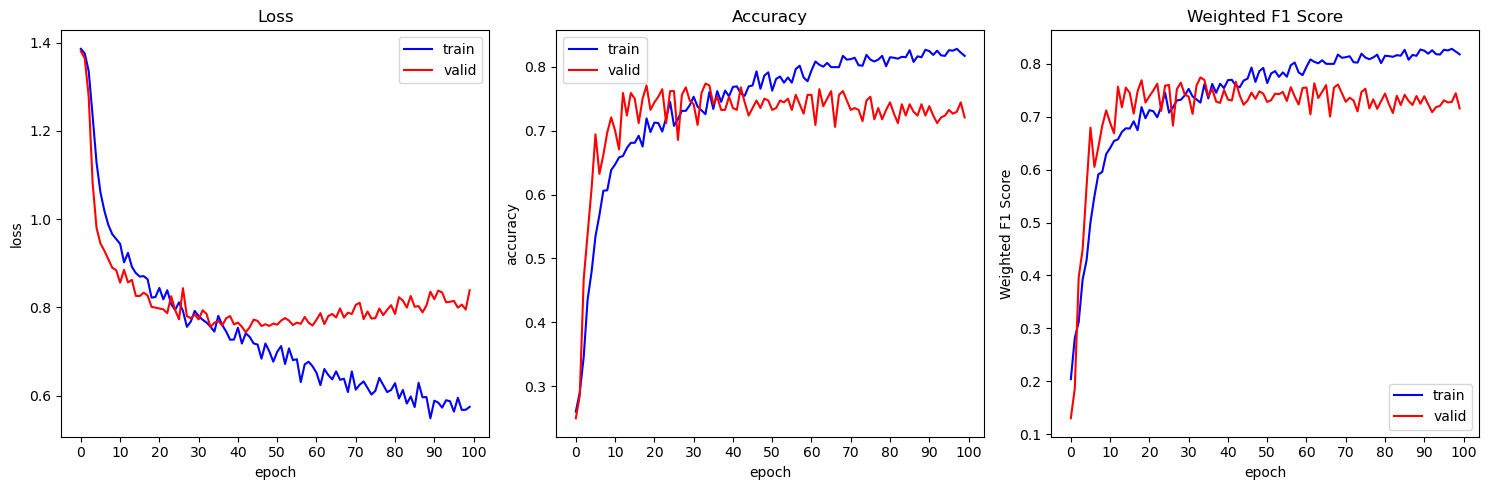

In [240]:
epoch_list = [e for e in range(NUM_EPOCHS)]
train_accuracy_list = [stat["accuracy"] for stat in train_statistics_list]
valid_accuracy_list = [stat["accuracy"] for stat in valid_statistics_list]
train_weighted_f1_score_list = [stat["weighted_f1_score"] for stat in train_statistics_list]
valid_weighted_f1_score_list = [stat["weighted_f1_score"] for stat in valid_statistics_list]


## print trend of statistics during the training process
xticks = [i * 10 for i in range(math.ceil(NUM_EPOCHS / 10) + 1)]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# loss
axes[0].plot(epoch_list, train_loss_list, 'b', label='train')
axes[0].plot(epoch_list, valid_loss_list, 'r', label='valid')
axes[0].set_title("Loss")
axes[0].set_xlabel("epoch")
axes[0].set_ylabel("loss")
axes[0].set_xticks(xticks)
axes[0].legend()

# accuracy
axes[1].plot(epoch_list, train_accuracy_list, 'b', label='train')
axes[1].plot(epoch_list, valid_accuracy_list, 'r', label='valid')
axes[1].set_title("Accuracy")
axes[1].set_xlabel("epoch")
axes[1].set_ylabel("accuracy")
axes[1].set_xticks(xticks)
axes[1].legend()

# weighted f1 score
axes[2].plot(epoch_list, train_weighted_f1_score_list, 'b', label='train')
axes[2].plot(epoch_list, valid_weighted_f1_score_list, 'r', label='valid')
axes[2].set_title("Weighted F1 Score")
axes[2].set_xlabel("epoch")
axes[2].set_ylabel("Weighted F1 Score")
axes[2].set_xticks(xticks)
axes[2].legend()

plt.tight_layout()
plt.show()

## Step 3: Evaluate Model

- After training the model, we are going to evaluate the model's final performance.
- You should choose the optimal model among all epochs during training that you think it performs best. **⚠️ The selected model would be evaluated on the training, validation, and testing dataset as your final model performance, and the final model performance would be use to evaluate your assignment ⚠️**.
    - Hint: you can design your own algorithm with the model performance on **validation dataset** to select the optimal model.

### Step 3-1: Select Optimal Model

#### Select The Model Among All Epochs During Training That You Think It Performs Best

In [242]:
# # design your own algorithm to select the optimal model
# ## TODO: 
# selected_model_epoch = ...  # the epoch index of your selected model

# print("selected_model_epoch = {}".format(selected_model_epoch))

best_epoch = -1
best_f1_score = -1.0  # Initialize with a very low score

# Loop through all the statistics you saved during training
for epoch, stats in enumerate(valid_statistics_list):
    current_f1_score = stats["weighted_f1_score"]
    
    # If this epoch's F1 score is the best we've seen, save this epoch
    if current_f1_score > best_f1_score:
        best_f1_score = current_f1_score
        best_epoch = epoch

selected_model_epoch = best_epoch
print("selected_model_epoch = {}".format(selected_model_epoch))

selected_model_epoch = 33


#### Load Selected Model

In [243]:
# load selected model
selected_model_save_name = "model_epoch_{:02d}.pt".format(selected_model_epoch)
selected_model_save_path = os.path.abspath(os.path.join(model_save_root, selected_model_save_name))
model.load_state_dict(torch.load(selected_model_save_path))
print("Selected Model: {}".format(selected_model_save_path))

Selected Model: /Users/nahathai/Desktop/NTHU/3rd year of hell/ML/lab4/1/model/model_epoch_33.pt


#### Evaluate Model On Training and Validation Dataset

- ⚠️ **Note: the the *accuracy* and *weighted F1 score* of the selected model on your validation dataset would be used to evaluate your assignment.**

In [244]:
## show statistics on training/validation dataset for the selected model
print("Statistics for the selected model: ")

# Model Peformance On Training Dataset
train_total_loss, train_statistics, train_y_pred = valid(train_dataloader)
print("Train -> Loss: {:.4f}, Accuracy: {:.4f}, F1 Score: {:.4f}".format(
    train_total_loss/len(train_dataloader), 
    train_statistics["accuracy"], 
    train_statistics["weighted_f1_score"], 
))

# Model Peformance On Valid Dataset
valid_total_loss, valid_statistics, valid_y_pred = valid(valid_dataloader)
print("Valid -> Loss: {:.4f}, Accuracy: {:.4f}, F1 Score: {:.4f}".format(
    valid_total_loss/len(valid_dataloader), 
    valid_statistics["accuracy"], 
    valid_statistics["weighted_f1_score"], 
))

Statistics for the selected model: 
Train -> Loss: 0.6053, Accuracy: 0.8456, F1 Score: 0.8457
Valid -> Loss: 0.7559, Accuracy: 0.7735, F1 Score: 0.7738


### Step 3-2: Evaluate Model On Testing Dataset

#### Define Test Function

- Define the `test` function for evaluating model performance on testing dataset.
    - Hint: you should NOT update the model on testing dataset

In [245]:
def test(
    dataloader     # the test dataloader
):
    y_pred = None  # collecting predictions for calculating statistics


    # set the model to eval mode
    model.eval()

    ## iterate each batch in test dataloader and evaluate the model
    with torch.no_grad():  # use `torch.no_grad` to ensure that no gradients are computed during evaluating model
        for idx, data in enumerate(dataloader):
            ## load data
            # load input features and label
            features = data["features"].to(DEVICE).float()

            
            ## evaluate model
            # forward propagation
            # Hint: pass the input features into model
            ## TODO: 
            output = model(features)######


            ## collect statistics
            # collect output
            output = output.cpu().detach().numpy()

            # convert output to class index
            output = np.argmax(output, axis=1)

            # collect y_pred
            y_pred = np.concatenate((y_pred, output), axis=0) if(isinstance(y_pred, np.ndarray)) else output

    
    # return y_pred
    return y_pred

#### Get and Save Your Test Prediction

- ⚠️ **Note: the *accuracy* and *weighted F1 score* of your testing prediction would be used to evaluate your assignment.**

In [246]:
# get your test prediction
test_y_pred = test(test_dataloader)

In [247]:
# create a new dataframe containing your test prediction
df_test_pred = pd.DataFrame(test_y_pred)

In [248]:
# show your test prediction
display(df_test_pred.head(5))
print("Shape of test prediction: {}".format(df_test_pred.shape))  # Note: the shape of test prediction should be (300, 1)

,0
0,0
1,2
2,2
3,1
4,1


Shape of test prediction: (300, 1)


In [250]:
# save your test prediction as csv
df_test_pred.to_csv(test_prediction_csv_output_path, index=False)

# Questions

Answer each question in the below markdown cell.

1. Observe the `train` function and `valid` function in Step 2. You will find that there're totally 5 steps when we train the model in the `train` function: (1) clear gradients, (2) forward propagation, (3) calculate loss, (4) backward propagation, (5) update model's parameters by optimizer. In contrast, there're only 2 steps involved when we evaluate the model in the `valid` function. Identify **which steps are required during training but NOT during evaluation**, and **explain why** they are unnecessary during evaluation. (2%)

2. Based on your model training process, do you think the model is experiencing **overfitting**? Describe **the reasons why** you claim this conclusion. (2%)

3. How did you improve your final model’s performance? Describe which **hyperparameters** and **architectural designs** do you think have the most significant impacts on evaluation metrics, and **exaplain why** they are effective. (1%)


## Your answer to the questions

1. The step that are required during training but not during evaluation are (1) clear gradients(optimizer.zero_grad()) (4).backward propagation(loss.backward()) and (5). update model's parameters by optimizer(optimizer). And the reason is because these step are learning part of the process and the valid fuction purpose is only to measure the model performance not changing the model. loss.backward() and optimizer.step() are what allow the model to learn from its mistakes.

2. Yes, I think my model is definitely experiencing overfitting. It is clear looking from my 100- epoch training log. 
Reason 1. Divering Loss--> my valid loss reach it lowest point at epoch 33 then my train loss kept getting lower but my valid loss stated to increase
Reason 2. Diverging Accuracy--> my valid accurary peak at epoch 33 and after that my train accuracy krept going higher but my valid accuracy got worse. Which is a classic sign of overfitting. It show that the model stop learning and start memorizing.

3. To improve my model final performance, I tuned several key hyperparameters and architechtural design. The most important one was the LEARNING_RATE it was intially 0.1 which is too high so I change to 0.001. After that I also added one more hidden layer(to find more complex patterns). Then I increase the BATCH_SIZE from 4 to 32 and NUM_EPOCHS from 10 to 100.


# Save the Code File
- ⚠️ **Please remember to save your code as a Jupyter Notebook file ("Lab4.ipynb") and submit it to eeclass along with your prediction files ("Lab4.csv")**.